>  Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> - **ScheduledDay**  tells us on what day the patient set up their appointment.
> - **Neighborhood** indicates the location of the hospital.
> - **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


 ## Data Dictionary
> - **PatientId** : Identification of a patient
> - **AppointmentID** : Identification of each appointment
> - **Gender** : Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
> - **DataMarcacaoConsulta** : The day of the actuall appointment, when they have to visit the doctor.
> - **DataAgendamento** : The day someone called or registered the appointment, this is before appointment of course.
> - **Age** : How old is the patient.
> - **Neighbourhood** : Where the appointment takes place.
> - **Scholarship** : True of False . Observation, this is a broad topic, consider reading this [article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
> - **Hipertension** : True or False
> - **Diabetes** : True or False
> - **Alcoholism** : True or False
> - **Handcap** : True or False
> - **SMS_received** : 1 or more messages sent to the patient.
> - **No-show** : True or False



### import  the important library that will be used

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sas
import plotly_express as px

<a id='wrangling'></a>
## Data Wrangling
> - **load data**
> - **assessing to data**



In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> - The ScheduledDay are object not datetime
> - The AppointmentDay are object not datetime  
> - no-show is object
> - There are no missing values

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> - the AppointmentID is great than PatientId,that means many pationt have one or more appintment

In [7]:
df.isnull().sum().sum()

0

> There are no missing values

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> - the **average** of age is **37** and the **oldest pationt** is **115**
> - The percentage of people with Handicap is **small**
> - The proportion of people delivered to whom messages were delivered is less than the average
> - The percentage of people addicted to alcohol is small
> - The percentage of people who suffer from chronic diseases such as high blood pressure and diabetes is a small percentage


In [57]:
df_corr=df.corr()
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_time
patientid,1.000000,0.004023,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456,-0.001459
appointmentid,0.004023,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,-0.162597,-0.771830
age,-0.004121,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327,0.034811
scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134,-0.030423
hipertension,-0.006436,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704,-0.017218
diabetes,0.001608,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181,-0.027190
alcoholism,0.011014,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197,-0.038520
handcap,-0.007915,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077,-0.019844
sms_received,-0.009742,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428,0.398143
no_show,-0.001456,-0.162597,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000,0.186228


<AxesSubplot:>

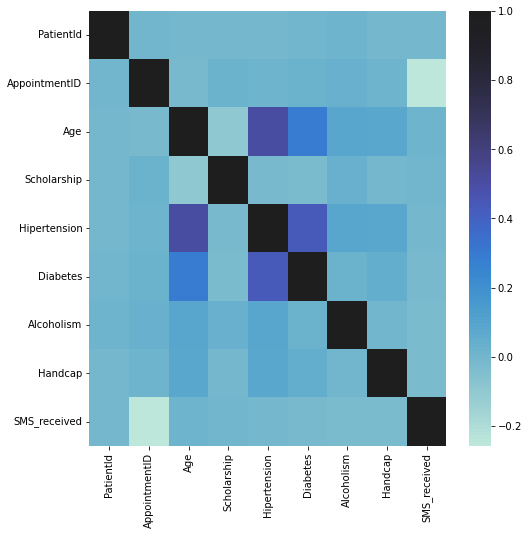

In [10]:
f,ax=plt.subplots(figsize=(8,8))
df_corr=df.corr()
sas.heatmap(df_corr,center=True)

> Relationship between age and high blood pressure is 0.504586

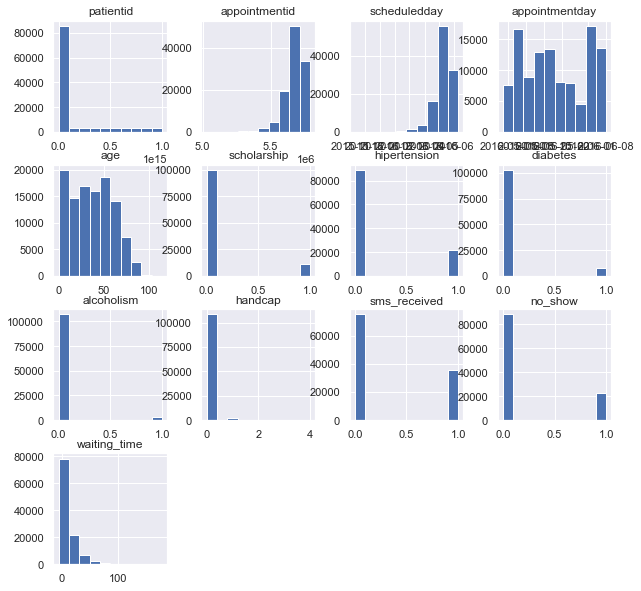

In [54]:
df.hist(figsize=(10,10));

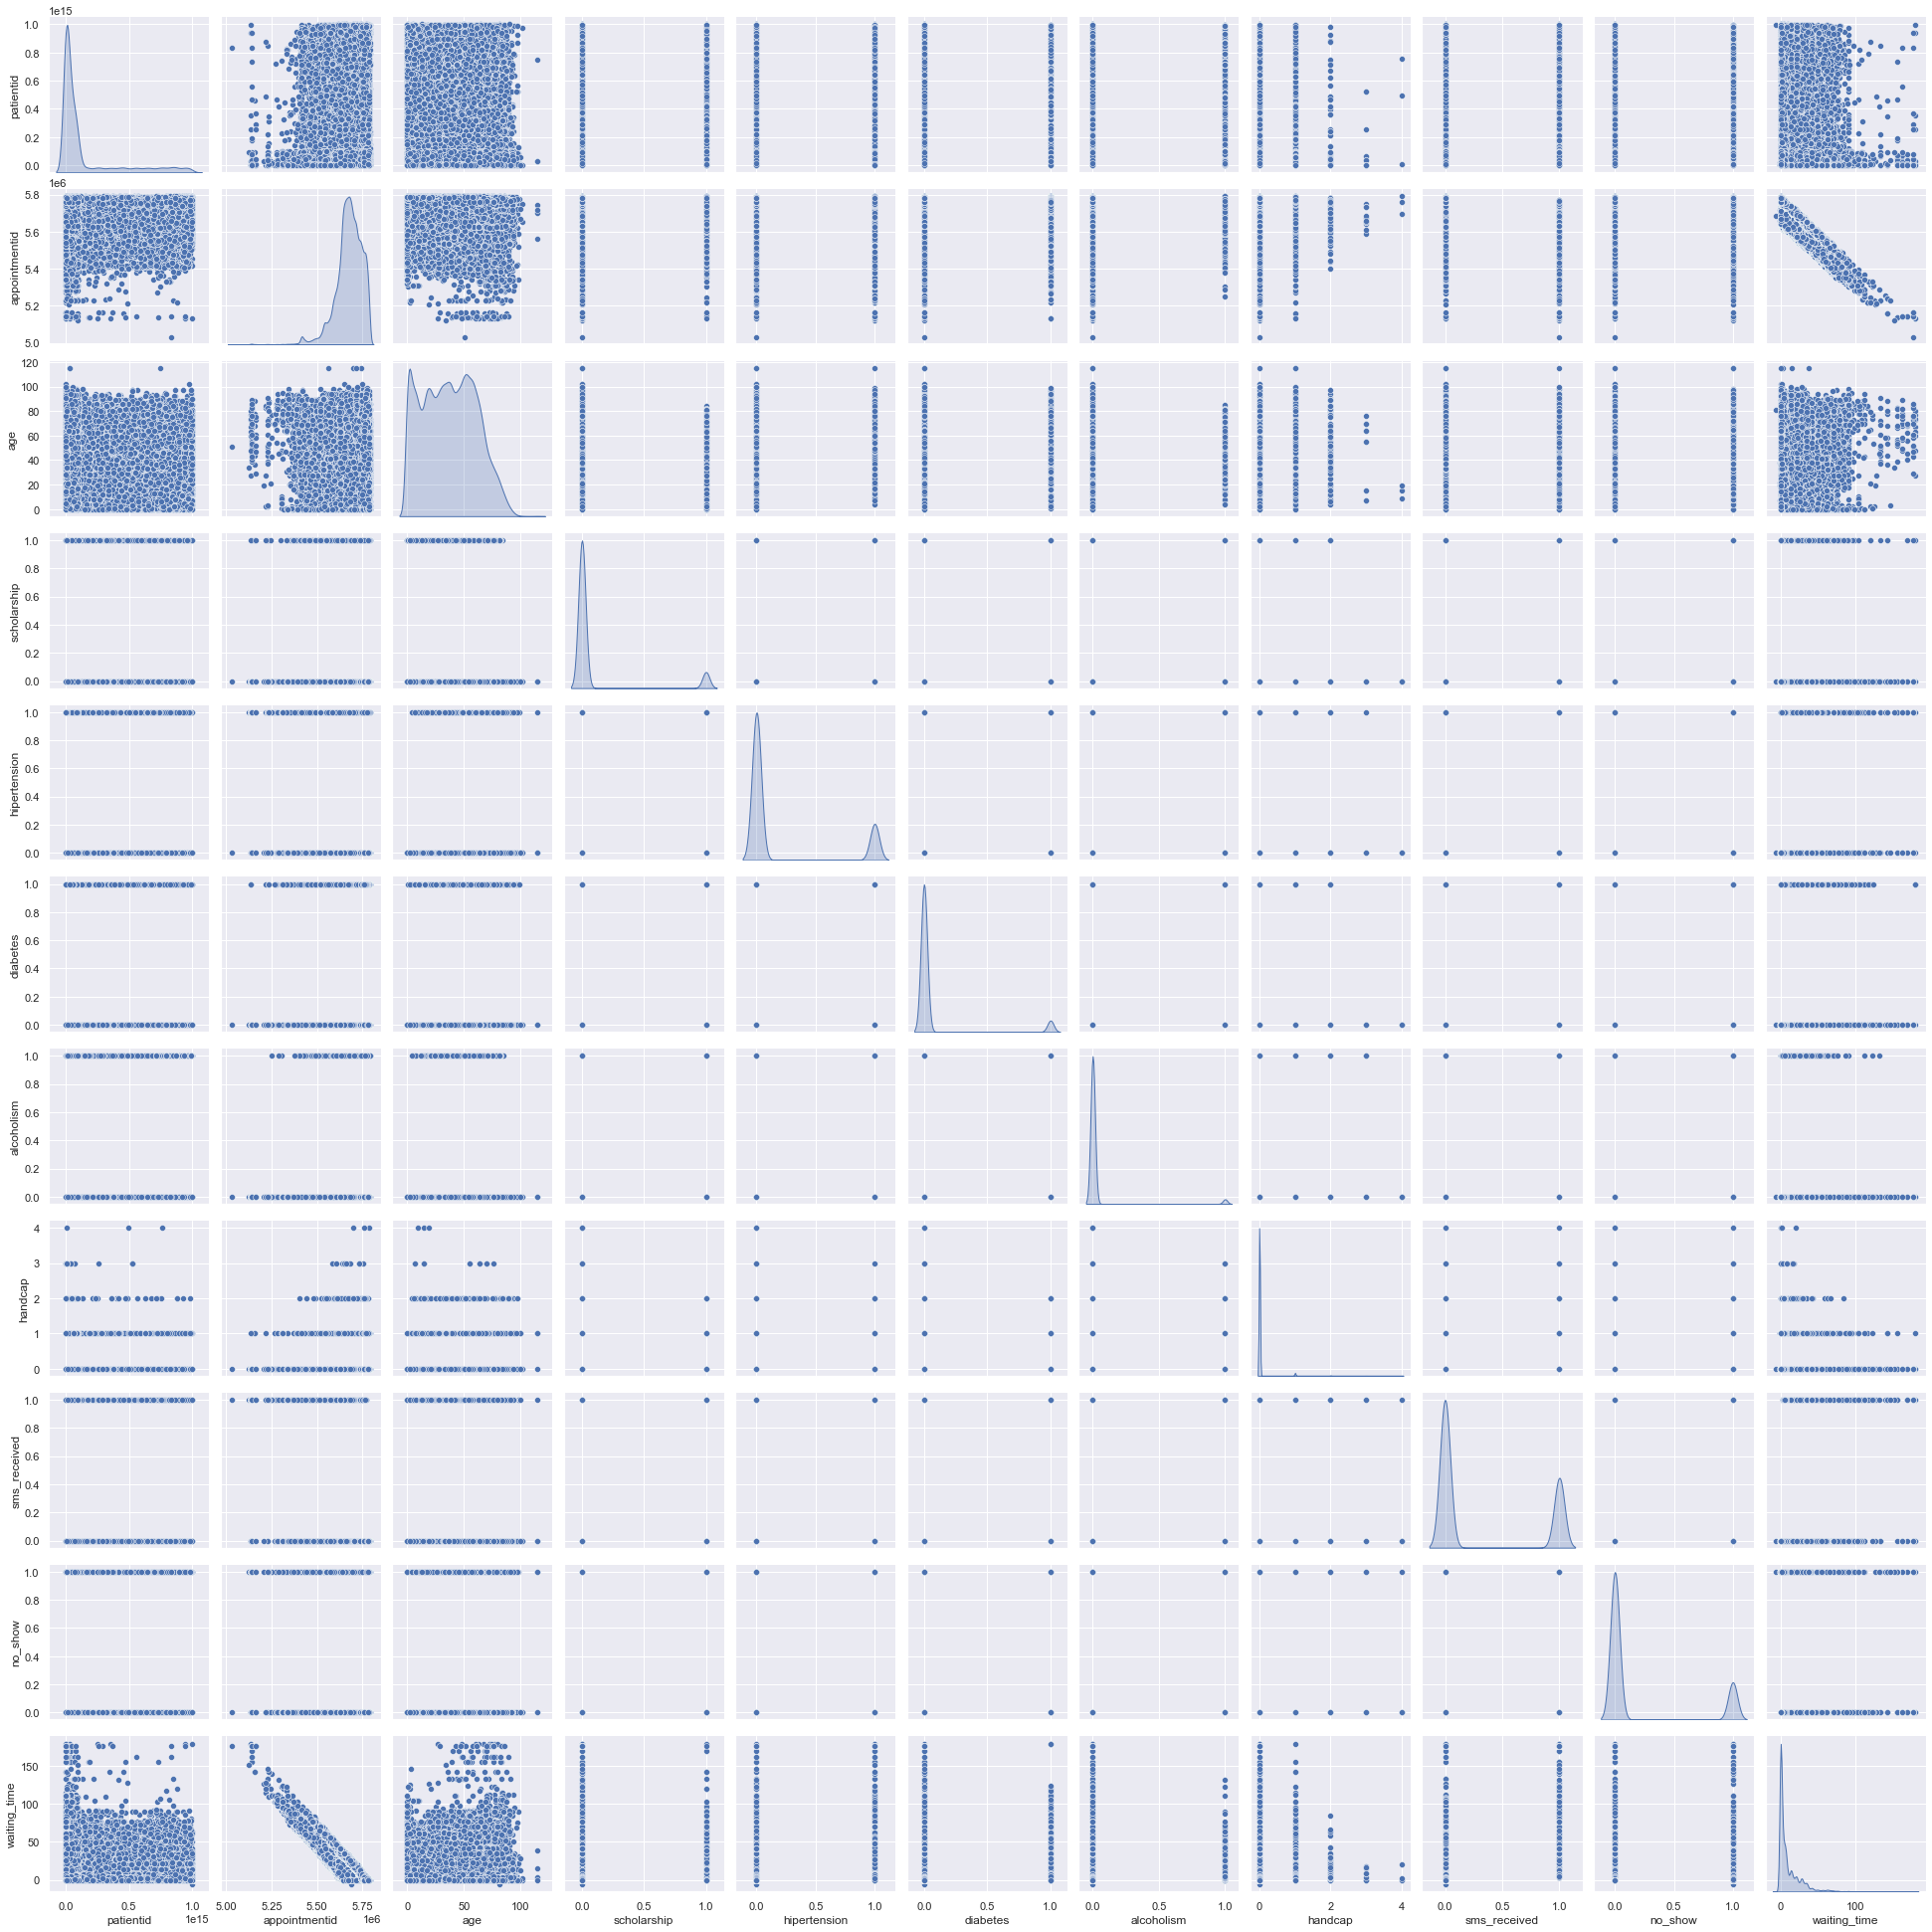

In [55]:
sas.pairplot(df,diag_kind='kde')

## info about Age 

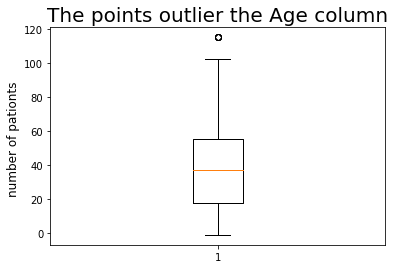

In [12]:
f,ax=plt.subplots()
ax.boxplot(df['Age'])
plt.title('The points outlier the Age column',fontsize=20)
plt.ylabel('number of pationts ',fontsize=12)
plt.show();

In [13]:
df['Age'].min()

-1

In [14]:
df.loc[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


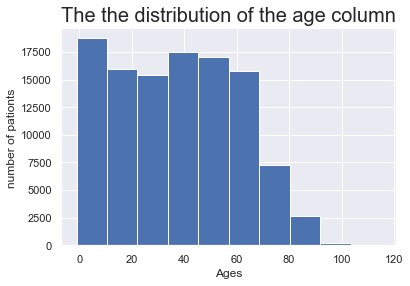

In [15]:
sas.set()
f,ax=plt.subplots()
ax.hist(df['Age'])
plt.title('The the distribution of the age column',fontsize=20)
plt.ylabel('number of pationts ',fontsize=12)
plt.xlabel('Ages')
plt.show();

## info about Gender 

In [16]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [17]:
df['Gender'].nunique()

2

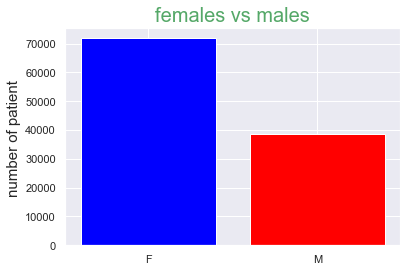

In [18]:
f,ax=plt.subplots()
ax.bar(df['Gender'].value_counts().index[0],df['Gender'].value_counts().values[0],label='F',color='blue')
ax.bar(df['Gender'].value_counts().index[1],df['Gender'].value_counts().values[1],label='M',color='red')
plt.ylabel('number of patient ',fontsize=15)
plt.title('females vs males',fontsize=20,color='g')
ax.set_label(['F','M'])
plt.show()

> - the number of female is double of number of males


## info about Neighbourhood

In [19]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [20]:
df['Neighbourhood'].nunique()

81

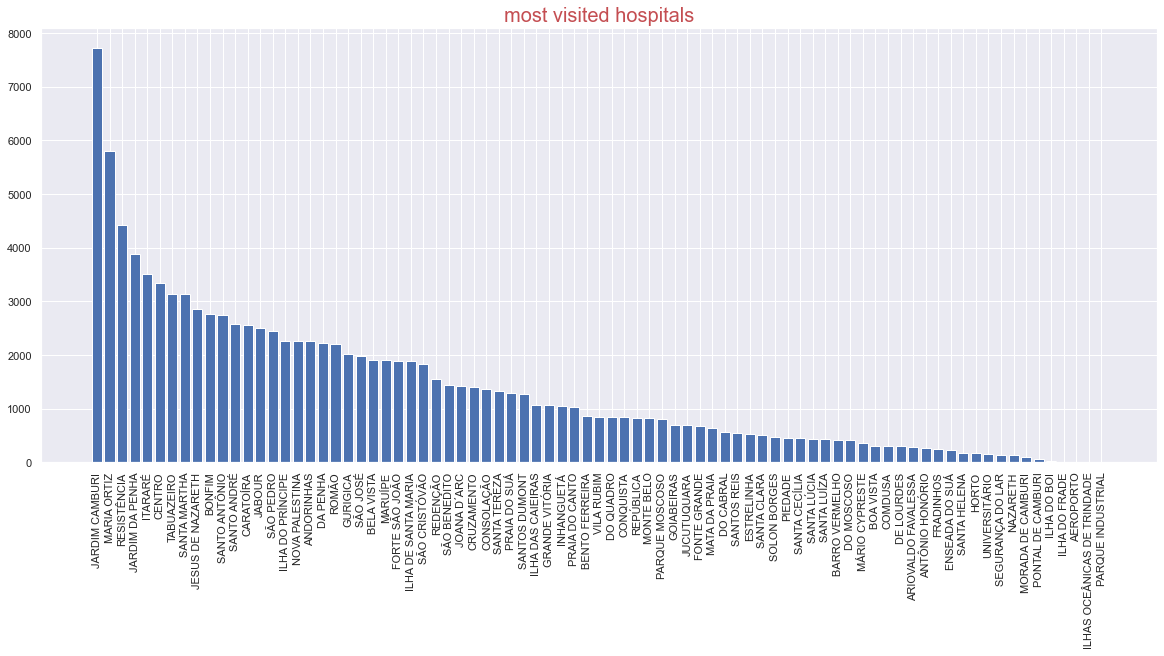

In [21]:
first_n=df['Neighbourhood'].value_counts()
f,ax=plt.subplots(figsize=(20,8))
ax.bar(first_n.index,first_n.values)
plt.xticks(rotation=90)
plt.title('most visited hospitals',fontsize=20,color='r')
plt.show()

In [22]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [23]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

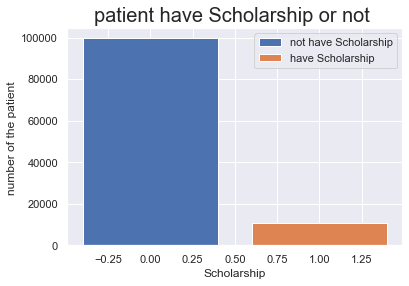

In [24]:
f,ax=plt.subplots()
ax.bar(df['Scholarship'].value_counts().index[0],df['Scholarship'].value_counts().values[0],label='not have Scholarship')
ax.bar(df['Scholarship'].value_counts().index[1],df['Scholarship'].value_counts().values[1],label='have Scholarship')
plt.title('patient have Scholarship or not ',fontsize=20)
plt.legend()
plt.xlabel('Scholarship')
plt.ylabel('number of the patient ')
plt.show()




> - There are many patients who don't have Scholarship
> - the number if the patient who have Scholarship Don't exceed 20,000 people

## info about Hipertension

In [25]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

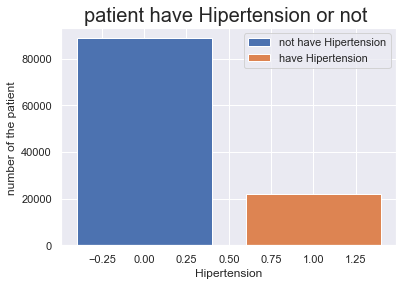

In [26]:
f,ax=plt.subplots()
ax.bar(df['Hipertension'].value_counts().index[0],df['Hipertension'].value_counts().values[0],label='not have Hipertension')
ax.bar(df['Hipertension'].value_counts().index[1],df['Hipertension'].value_counts().values[1],label='have Hipertension')
plt.title('patient have Hipertension or not ',fontsize=20)
plt.legend()
plt.xlabel('Hipertension')
plt.ylabel('number of the patient ')
plt.show()




> - the number if the patient who have Hipertension more than  20,000 people

## info about Diabetes

In [27]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [28]:
df['Diabetes'].nunique()

2

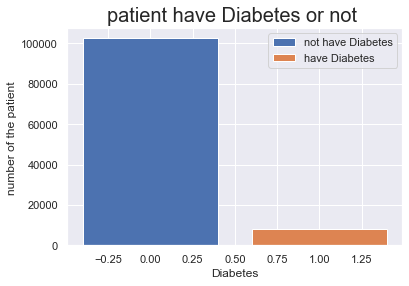

In [29]:
f,ax=plt.subplots()
ax.bar(df['Diabetes'].value_counts().index[0],df['Diabetes'].value_counts().values[0],label='not have Diabetes')
ax.bar(df['Diabetes'].value_counts().index[1],df['Diabetes'].value_counts().values[1],label='have Diabetes')
plt.title('patient have Diabetes or not ',fontsize=20)
plt.legend()
plt.xlabel('Diabetes')
plt.ylabel('number of the patient ')
plt.show()



> - the number if the patient who have Diabetes less than  20,000 people

## info about  Alcoholism

In [30]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

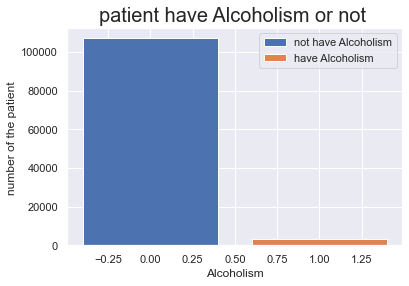

In [31]:
f,ax=plt.subplots()
ax.bar(df['Alcoholism'].value_counts().index[0],df['Alcoholism'].value_counts().values[0],label='not have Alcoholism')
ax.bar(df['Alcoholism'].value_counts().index[1],df['Alcoholism'].value_counts().values[1],label='have Alcoholism')
plt.title('patient have Alcoholism or not ',fontsize=20)
plt.legend()
plt.xlabel('Alcoholism')
plt.ylabel('number of the patient ')
plt.show()


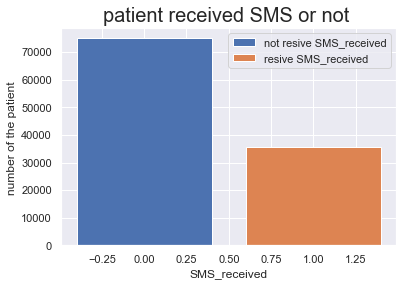

In [32]:
f,ax=plt.subplots()
ax.bar(df['SMS_received'].value_counts().index[0],df['SMS_received'].value_counts().values[0],label='not resive SMS_received')
ax.bar(df['SMS_received'].value_counts().index[1],df['SMS_received'].value_counts().values[1],label='resive SMS_received')
plt.title('patient received SMS or not ',fontsize=20)
plt.legend()
plt.xlabel('SMS_received')
plt.ylabel('number of the patient ')
plt.show()


> - The percentage of people who received sms is 32% 
> - The percentage of people who received sms is 68%

## info about no-show

In [33]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

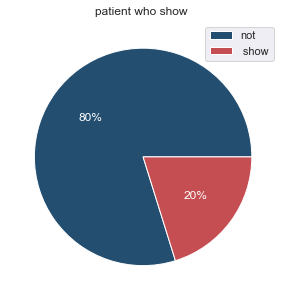

In [34]:
f=plt.figure(figsize=(8,5))
plt.pie(df['No-show'].value_counts().values,labels=['not',' show'],autopct='%.0f%%', textprops={'color':"w"},colors=['#234E70', 'r'])
plt.title('patient who show ')
plt.legend()
plt.show()

> - The percentage of people who show  is 20% 


<a id='Cleaning'></a>

# Data Cleaning 

> 1 - first we fixed the name of columns.

In [35]:
df.rename(columns=lambda x: x.lower().replace('-','_'),inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
show=df.no_show=='Yes'
not_show=df.no_show=='No'

> - data types need to be converted :
    - ScheduledDay to datetime.
    - AppointmentDay to datetime.
>- creat new columns name 
    - waiting time
    -appointmentday_date
    -scheduledday_date
    

In [37]:
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['scheduledday_date']=df['scheduledday'].dt.date

df['appointmentday']=pd.to_datetime(df['appointmentday'])

df['appointmentday_date']=df['appointmentday'].dt.date

df['waiting_time']=(df['appointmentday_date']-df['scheduledday_date']).dt.days

df['waiting_time']=df['waiting_time'].astype(int)
#test
df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduledday_date,appointmentday_date,waiting_time
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


<AxesSubplot:>

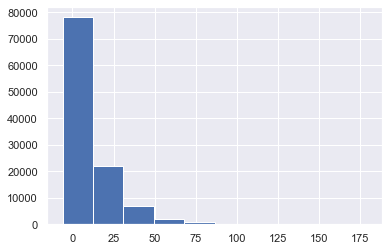

In [38]:
df['waiting_time'].hist()

In [39]:
df.loc[df['age']<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduledday_date,appointmentday_date,waiting_time
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,2016-06-06,2016-06-06,0


In [40]:
df.drop(df.loc[df['age']<0].index,axis=0,inplace=True)
#test
df.loc[df['age']<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduledday_date,appointmentday_date,waiting_time


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (which feature is effect  on no_show)

In [41]:
df['no_show']=df['no_show'].astype('category')
df['no_show']=df['no_show'].cat.codes
print(df['no_show'].dtypes)


int8


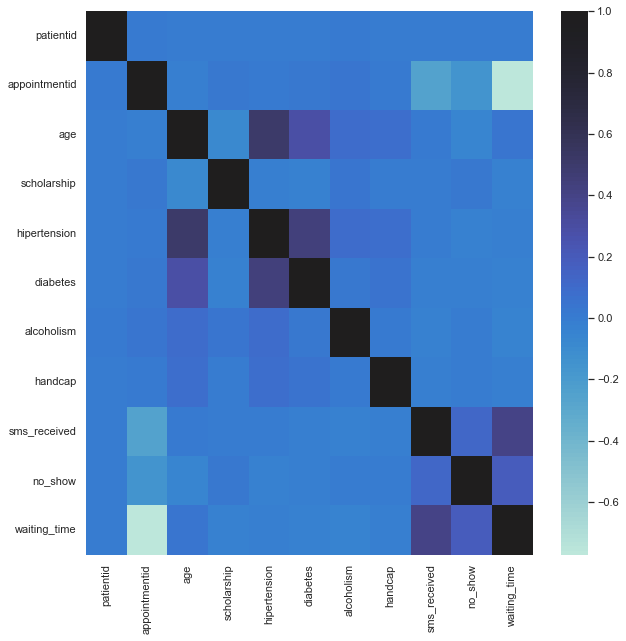

In [42]:
df.corr()
f, ax = plt.subplots(figsize=(10,10))

sas.heatmap(df.corr(),center=True);

### Research Question  ( Is any deseases (Hipertension , Diabetes, handcap,alcoholism) affect the patient's show up?)

C:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abrah\anaconda3\lib\si

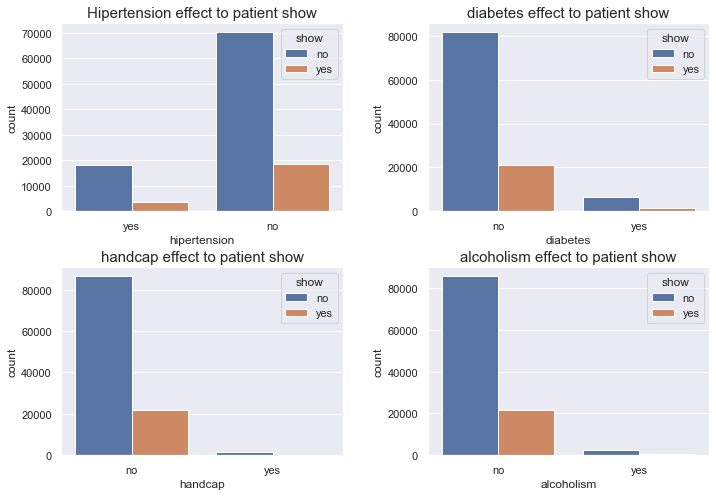

In [43]:
#for hipertension

plt.subplot(2,2,1)
hip_mab=df['hipertension'].map({1:'yes',0:'no'})
sas.countplot(hip_mab,data=df,hue='no_show')
plt.title('Hipertension effect to patient show',fontsize=15)
plt.legend(title='show',labels=['no','yes'])

#for diabetes

plt.subplot(2,2,2)
dia_mab=df['diabetes'].map({1:'yes',0:'no'})
sas.countplot(dia_mab,data=df,hue='no_show')
plt.title('diabetes effect to patient show',fontsize=15)
plt.legend(title='show',labels=['no','yes'])
#plt.subplots_adjust(left=0,right=1,5,bottom=0,top=1.5)

#for handcap
plt.subplot(2,2,3)
han_mab=df['handcap'].map({1:'yes',0:'no'})
sas.countplot(han_mab,data=df,hue='no_show')
plt.title('handcap effect to patient show',fontsize=15)
plt.legend(title='show',labels=['no','yes'])

#for alcoholism
plt.subplot(2,2,4)
alc_mab=df['alcoholism'].map({1:'yes',0:'no'})
sas.countplot(alc_mab,data=df,hue='no_show')
plt.title('alcoholism effect to patient show',fontsize=15)
plt.legend(title='show',labels=['no','yes'])

plt.subplots_adjust(left=0,right=1.5,bottom=0,top=1.5,wspace=0.3,hspace=0.3)


### we can some nots that from Diagram 
> 1 - hipertension
>   - In case people have hipertension,The number of people attending doesn't exceed 5000
>   - In case people haven't hipertension,The number of people attending doesn't exceed 20000
>   - This number does not exceed half of those who do not attend

> 2 - diabetes
>   - In this case, we find that the percentage of those who attend may reach a quarter compared to those who do not attend


> 3 - handcap
>   - In case people haven't handcap,The number of people attending  exceed 20000
>   - in the othe case ,we find that all  people have handcap  attending 


> 4 - alcoholism
>   - In this case, all people who are addicted to alcohol will attend
>   - in the other side percentage of those who attend may reach a quarter compared to those who do not attend


### Research Question : Is the waiting time affect the patient's show ?


Text(0, 0.5, 'number of patient  ')

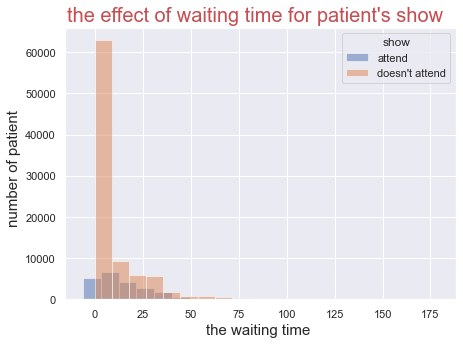

In [53]:
f,ax=plt.subplots(figsize=(7,5))
df.waiting_time[show].hist(alpha=0.5, bins=20, label='attend')

df.waiting_time[not_show].hist(alpha=0.5, bins=20, label='doesn\'t attend')
plt.title('the effect of waiting time for patient\'s show  ',fontsize=20,c='r')
plt.legend(title='show')
plt.xlabel('the waiting time ',fontsize=15)
plt.ylabel('number of patient  ',fontsize=15)


> From this figure, it becomes clear to us that the longer the number of waiting days, the lower the attendance rate, and that the special percentage is less than a day in which we find cursing absence is high.

### Research Question : Is the age affect the patient's show ?


Text(0, 0.5, 'number of patient   ')

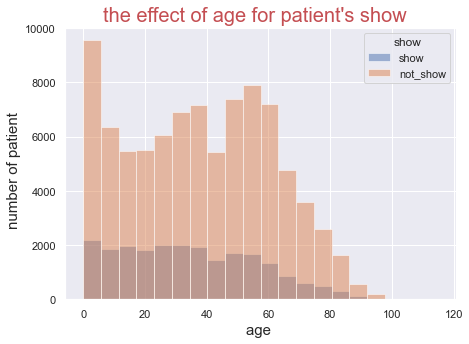

In [52]:
f,ax=plt.subplots(figsize=(7,5))
df.age[show].hist(alpha=0.5, bins=20, label='show')

df.age[not_show].hist(alpha=0.5, bins=20, label='not_show')
plt.title('the effect of age for patient\'s show  ',fontsize=20,c='r')
plt.legend(title='show')
plt.xlabel('age ',fontsize=15)
plt.ylabel('number of patient   ',fontsize=15)


> - In the previous figure, it becomes clear to us some data that show that the older the age, the lower the attendance rate
> - The attendance rate in general may exceed half, in contrast to the non-attendance rate, which we find at different ages

### Research Question : Is the gender affect the patient's show ?


Text(0, 0.5, 'the waiting time  ')

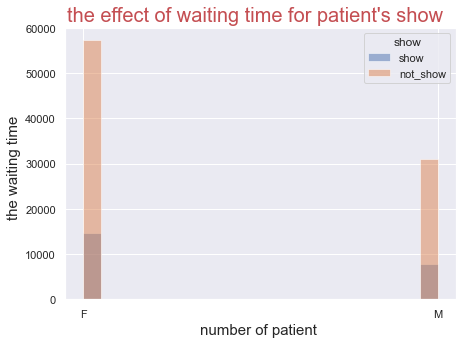

In [46]:
f,ax=plt.subplots(figsize=(7,5))
df.gender[show].hist(alpha=0.5, bins=20, label='show')

df.gender[not_show].hist(alpha=0.5, bins=20, label='not_show')
plt.title('the effect of waiting time for patient\'s show  ',fontsize=20,c='r')
plt.legend(title='show')
plt.xlabel('number of patient ',fontsize=15)
plt.ylabel('the waiting time  ',fontsize=15)


> - In the previous figure, we find that the attendance rate for women does not exceed 20,000, while the number of women may approach 60,000
> - As for men, the attendance rate may reach a quarter compared to non-attendance

### Research Question : Is the neighbourhood affect the patient's show ?


Text(0, 0.5, 'number of patient  ')

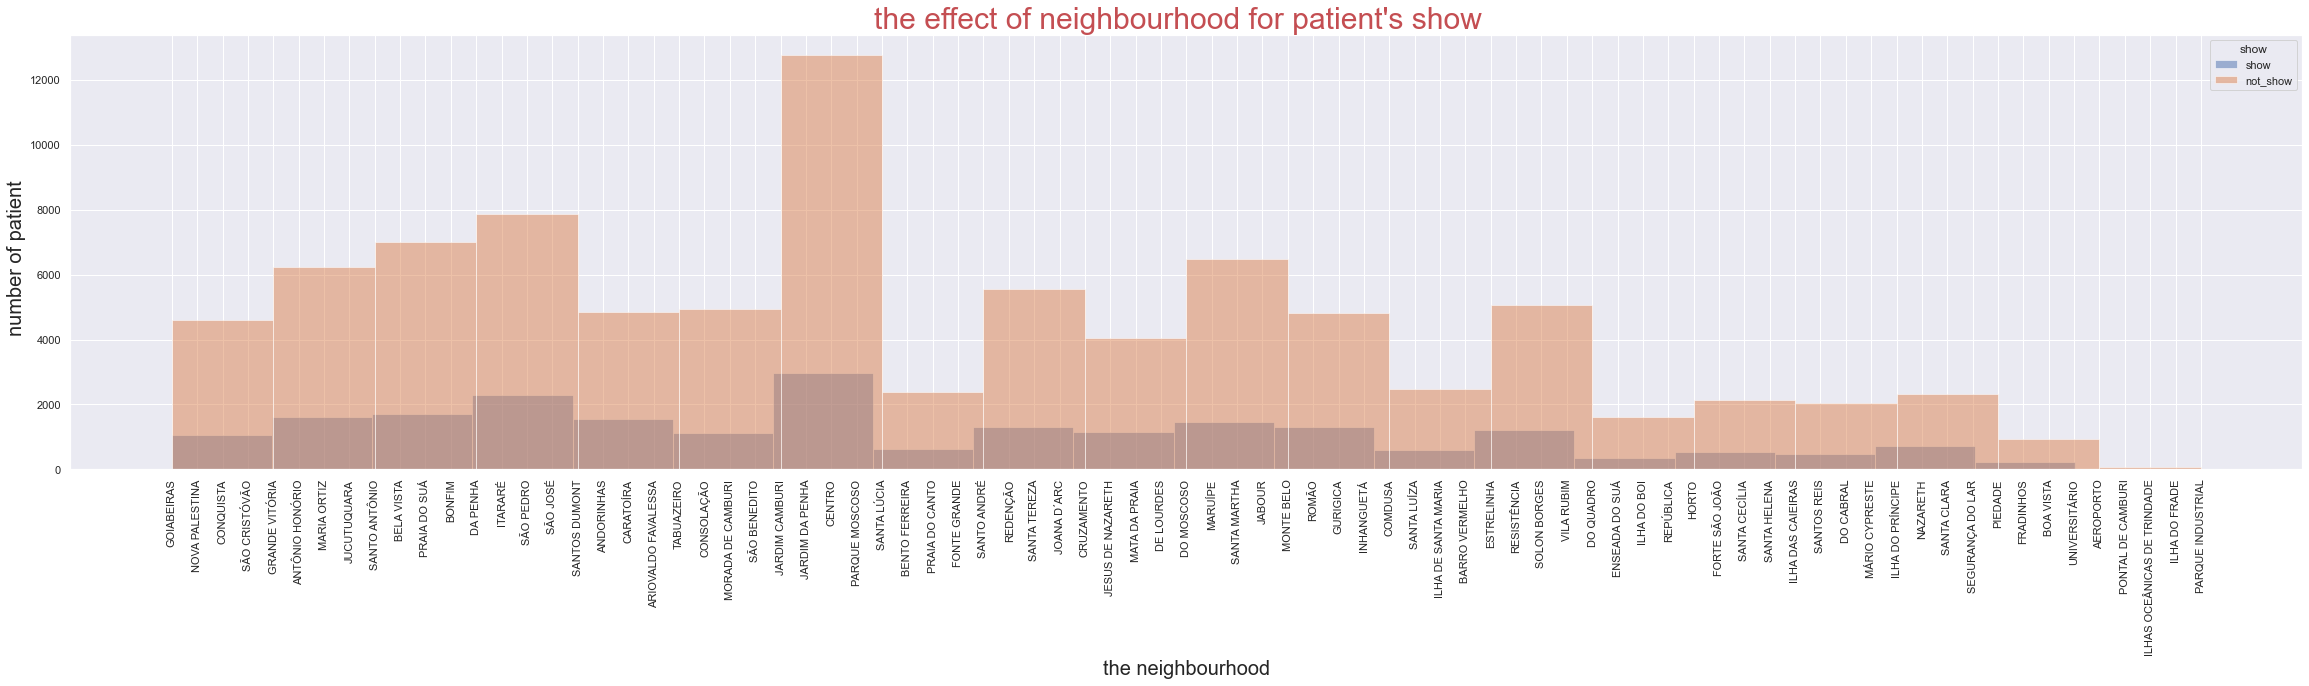

In [47]:
f,ax=plt.subplots(figsize=(40,8))
df.neighbourhood[show].hist(alpha=0.5, bins=20, label='show')
df.neighbourhood[not_show].hist(alpha=0.5, bins=20, label='not_show')
plt.title('the effect of neighbourhood for patient\'s show  ',fontsize=30,c='r')
plt.legend(title='show')
plt.xticks(rotation=90)
plt.xlabel('the neighbourhood',fontsize=20)
plt.ylabel('number of patient  ',fontsize=20)


> - In the previous figure, we find that the percentage of attendance varies from one place to another

### Research Question : Is the age stages affect the patient's show ?


In [48]:
def stage(x):
    if x > 0 and x<= 12:
        x='childs'
    elif x > 12 and x <=16:
        x='Adolescence'
    elif x>16 and x <=65:
        x='middel-age'
    else:
        x='aging stage'
    return x

In [49]:
df['stage']=df['age'].apply(stage)

In [50]:
df['stage']

0         middel-age
1         middel-age
2         middel-age
3             childs
4         middel-age
             ...    
110522    middel-age
110523    middel-age
110524    middel-age
110525    middel-age
110526    middel-age
Name: stage, Length: 110526, dtype: object

Text(0, 0.5, 'number of patient  ')

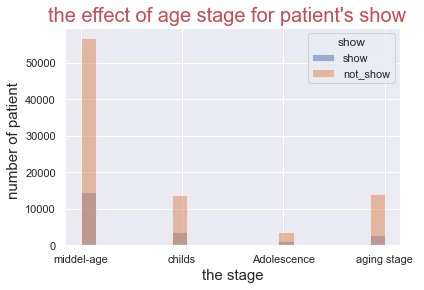

In [51]:
f,ax=plt.subplots()
df.stage[show].hist(alpha=0.5, bins=20, label='show')
df.stage[not_show].hist(alpha=0.5, bins=20, label='not_show')
plt.title('the effect of age stage for patient\'s show  ',fontsize=20,c='r')
plt.legend(title='show')
plt.xlabel('the stage',fontsize=15)
plt.ylabel('number of patient  ',fontsize=15)


> We note from the figure that the percentage that attends in different age periods varies, but we find that the percentage of non-attendance in the youth stage is more than in other stages

<a id='conclusions'></a>
## Conclusions

> -From the two previous statements, we can find that the previous elements may affect the presence of the patient or not
> - for example
>     - The waiting time that the patient must suffer from, so we find some values, such as that the patient can wait for a long period, it may exceed a month, and this percentage does not usually come 
>     - Clinic locations. From this data you will find attendance rates vary from one place to another. It can be said that the clinic locations affect the attendance rates of patients.
>     -With regard to gender, we may find that females are more likely than males, but this does not mean that the percentage of female attendance is more, but we may be close in percentages. Also, we find that this data has a difference in the number of females from males. 
>     -As for chronic diseases, we may find that they do not clearly affect attendance rates, and we see this from the drawing

# Limititions.

> **sense values like**
>   - age < 0
>   - age have outliers 

>**There is a difference in values**
>  -  the number of females is great than males
>  - There is a difference in age for different age stages